In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [31]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Iris.csv to Iris (1).csv


In [32]:
import io
  
df = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))
print(df)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [33]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [34]:
import seaborn as sns

**k Nearest Neighbour**


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


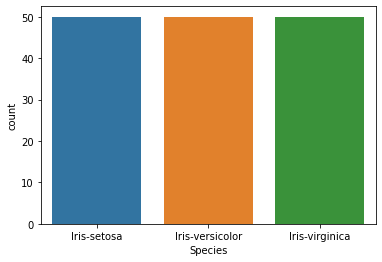

In [35]:
sns.countplot(df['Species'])


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['Species'], axis = 1)
y= df['Species']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [39]:
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.95      0.98        22
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


In [40]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix
accuracy = accuracy_score(y_test, pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 98.0 %.


**Decision Tree**

In [41]:

df.drop("Id",axis = 1,inplace = True)

X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = df[['Species']]

from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()


tree_model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
from sklearn.tree import DecisionTreeClassifier 
model2 = DecisionTreeClassifier(criterion='entropy', random_state=0)  
model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [49]:
y_pred= model2.predict(X_test) 
accuracy2 = model2.score(X_test,y_test)*100
print("Decision Tree Accuracy is:",accuracy2)


Decision Tree Accuracy is: 100.0


**SVM**

In [51]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

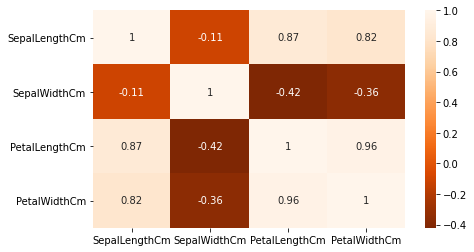

In [52]:
plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='Oranges_r')
plt.show()

In [53]:
train, test = train_test_split(df, test_size = 0.3)
X_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_train = train.Species
X_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y_test = test.Species
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
39,5.1,3.4,1.5,0.2
121,5.6,2.8,4.9,2.0
115,6.4,3.2,5.3,2.3
75,6.6,3.0,4.4,1.4
17,5.1,3.5,1.4,0.3


In [54]:
y_train.head()

39         Iris-setosa
121     Iris-virginica
115     Iris-virginica
75     Iris-versicolor
17         Iris-setosa
Name: Species, dtype: object

In [57]:
model = svm.SVC().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'The accuracy of the SVM model is: {metrics.accuracy_score(y_pred, y_test)}')

The accuracy of the SVM model is: 0.9777777777777777


Accuracy is 97.7%

**Logistics Regression**

In [58]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'The accuracy of logistic regression is: {metrics.accuracy_score(y_pred, y_test)}')

The accuracy of logistic regression is: 0.9777777777777777


Accuracy is 97.7%

In [59]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [61]:
test_df = pd.read_csv('Iris.csv')
test_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
from sklearn.neighbors import KNeighborsClassifier
k = 7
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.96
KNN F1-score: 0.96


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [70]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DT_model.fit(X_train,y_train)
DT_model
yhat = DT_model.predict(X_test)
yhat
DT_yhat = DT_model.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.2f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.93
DT F1-score: 0.93


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [76]:

from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train)

SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )


SVM Jaccard index: 0.98
SVM F1-score: 0.98


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [74]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.69
LR F1-score: 0.64
LR LogLoss: 0.71


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Algorithm	| Jaccard |	F1-score |	LogLoss|
----------|---------|----------|---------|
KNN	      | 0.96    |	0.96     |	NA     |
Decision Tree|	0.93|	0.93|	NA|
SVM |	0.98|	0.98|	NA|
Logistic Regression |	0.69|	0.64|	0.71|